<a href="https://colab.research.google.com/github/sgkks/EnvDatSci/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#attach to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install packages for Google Colab
%%capture
!pip install rasterio
!pip install earthpy

In [ ]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import numpy as np
import earthpy as et
import earthpy.plot as ep

In [ ]:
!pip install geopandas

In [ ]:
!pip install earthpy
!pip install rtree
!pip install pygeos
!pip install mapclassify>=2.4.0

In [ ]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [ ]:
folder_path = '/content/drive/My Drive/CEE609/ResearchData'

os.chdir(folder_path)

print(os.getcwd())

list_dir = os.listdir(folder_path)

print(list_dir)


/content/drive/My Drive/CEE609/ResearchData
['Water_Main_Breaks_(2004-2019).shp', 'Water_Main_Breaks_(2004-2019).shx', 'Water_Main_Breaks_(2004-2019).cpg', 'Water_Main_Breaks_(2004-2019).prj', 'Water_Main_Breaks_(2004-2019).dbf', 'SYRCityline_Requests_(2021-Present).xml', 'SYRCityline_Requests_(2021-Present).shp', 'SYRCityline_Requests_(2021-Present).dbf', 'SYRCityline_Requests_(2021-Present).cpg', 'SYRCityline_Requests_(2021-Present).prj', 'SYRCityline_Requests_(2021-Present).shx', 'columns.csv', 'usa.cpg', 'usa.prj', 'usa.dbf', 'usa.shx', 'usa.shp', 'Syracuse_City_Boundary.cpg', 'Syracuse_City_Boundary.shx', 'Syracuse_City_Boundary.xml', 'Syracuse_City_Boundary.prj', 'Syracuse_City_Boundary.shp', 'Syracuse_City_Boundary.dbf', 'modified_water_main_breaks.prj', 'modified_water_main_breaks.cpg', 'modified_water_main_breaks.dbf', 'modified_water_main_breaks.shx', 'modified_water_main_breaks.shp', 'modified_geodataframe.shp', 'modified_geodataframe.shx', 'modified_geodataframe.dbf', 'modi

In [113]:
import geopandas as gpd

# Determine the boundary of the project area
file_path = 'Syracuse_City_Boundary.shp'

# Read the shapefile using geopandas
boundary_area = gpd.read_file(file_path)

# Print some info to check if it loaded correctly
print(boundary_area.head())
print(boundary_area.info())

   FID  FID_Syracu STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10  \
0    1          54        36        067    000100  36067000100      1   

       NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0  Census Tract 1   G5020          S  4842958   1284980  +43.0691355   

     INTPTLON10  TractID                                           geometry  
0  -076.1730170        1  POLYGON ((-8477821.69 5324574.363, -8477654.82...  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         1 non-null      int32   
 1   FID_Syracu  1 non-null      int32   
 2   STATEFP10   1 non-null      object  
 3   COUNTYFP10  1 non-null      object  
 4   TRACTCE10   1 non-null      object  
 5   GEOID10     1 non-null      object  
 6   NAME10      1 non-null      object  
 7   NAMELSAD10  1 non-null      object  
 8   MTFCC10     1 non-

In [ ]:
import geopandas as gpd

# Locate the file to be used for water main break data
file_path = 'Water_Main_Breaks_(2004-2019).shp'

# Read the shapefile using geopandas
water_main_breaks = gpd.read_file(file_path)

# Print some info to check if it loaded correctly
print(water_main_breaks.head())
print(water_main_breaks.info())


    fullDate                location  leakClass month  date weekday    year  \
0 2011-01-14       1205 W FAYETTE ST          0   1.0  14.0    None  2011.0   
1 2011-01-14     1003 JAMESVILLE AVE          0   1.0  14.0    None  2011.0   
2 2011-01-14  PALMER AVE & CHENEY ST          0   1.0  14.0    None  2011.0   
3 2011-01-16       2100 E FAYETTE ST          0   1.0  16.0    None  2011.0   
4 2011-01-17        206 BUTTERNUT ST          0   1.0  17.0    None  2011.0   

  week        lon        lat  ObjectId                          geometry  
0  2.0 -76.175575  43.046733         1  POINT (-8479826.176 5319087.828)  
1  2.0 -76.128918  43.016895         2  POINT (-8474632.427 5314543.828)  
2  2.0 -76.162257  43.030022         3  POINT (-8478343.686 5316542.657)  
3  3.0 -76.113683  43.048158         4   POINT (-8472936.428 5319304.88)  
4  3.0 -76.151936  43.057713         5  POINT (-8477194.752 5320760.511)  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3042 entries, 0 t

In [105]:
# Process only the useful parts of the water main break data
import geopandas as gpd
file_path = 'Water_Main_Breaks_(2004-2019).shp'
water_main_breaks = gpd.read_file(file_path)

# Create a list of ObjectIDs which has irrelevant data to be removed
object_ids_to_remove = [2932, 2933, 2934, 2935]

# Filter the GeoDataFrame to exclude the specified ObjectIDs
water_main_breaks = water_main_breaks[~water_main_breaks.ObjectId.isin(object_ids_to_remove)]

# Clip water_main_breaks to boundary_area
file_path = 'Syracuse_City_Boundary.shp'
boundary_area = gpd.read_file(file_path)
clipped_water_main_breaks = gpd.clip(water_main_breaks, boundary_area)

# Print some info to check if the rows were removed
print(clipped_water_main_breaks.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2992 entries, 1771 to 2253
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fullDate   2991 non-null   datetime64[ms]
 1   location   2980 non-null   object        
 2   leakClass  2992 non-null   int32         
 3   month      2991 non-null   object        
 4   date       2991 non-null   object        
 5   weekday    0 non-null      object        
 6   year       2991 non-null   object        
 7   week       2991 non-null   object        
 8   lon        2992 non-null   float64       
 9   lat        2992 non-null   float64       
 10  ObjectId   2992 non-null   int32         
 11  geometry   2992 non-null   geometry      
dtypes: datetime64[ms](1), float64(2), geometry(1), int32(2), object(6)
memory usage: 280.5+ KB
None


In [ ]:
import geopandas as gpd

# Identify the file to be used for pothole data as it is associated with water system failures
file_path = 'SYRCityline_Requests_(2021-Present).shp'

# Read the shapefile using geopandas
existing_potholes = gpd.read_file(file_path)

# Print some info to check if it loaded correctly
print(existing_potholes.head())
print(existing_potholes.info())

         Id              Summary  Rating  \
0  10139153             Potholes       2   
1  10568233  Weekly Trash Pickup       2   
2  10568243  Weekly Trash Pickup       2   
3  10568255            Recycling       2   
4  10568301            Recycling       2   

                                     Address  \
0  101 Ny-5 Syracuse NY 13204, United States   
1   304 Mildred Ave Syracuse, NY, 13206, USA   
2    113 Neutral Ct Syracuse, NY, 13208, USA   
3       100 Arch St Syracuse, NY, 13206, USA   
4       100 Arch St Syracuse, NY, 13206, USA   

                           Descriptio                           Agency_Nam  \
0  Pothole entering lot 3 parking lot  Streets, Sidewalks & Transportation   
1       did not take all of the trash        Garbage, Recycling & Graffiti   
2                             skipped        Garbage, Recycling & Graffiti   
3                             skipped        Garbage, Recycling & Graffiti   
4                   recycling skipped        Garbage, Re

In [ ]:
# Filter the GeoDataFrame to include only rows where 'Summary' contains 'Pothole'
potholes_only = existing_potholes[existing_potholes['Summary'].str.contains('Potholes', case=False)]

# Print some info to check the extracted data
print(potholes_only.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2424 entries, 0 to 60190
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Id          2424 non-null   int32   
 1   Summary     2424 non-null   object  
 2   Rating      2424 non-null   int32   
 3   Address     2424 non-null   object  
 4   Descriptio  1919 non-null   object  
 5   Agency_Nam  2424 non-null   object  
 6   Request_ty  2424 non-null   int32   
 7   URL         2424 non-null   object  
 8   Lat         2424 non-null   float64 
 9   Lng         2424 non-null   float64 
 10  Export_tag  2424 non-null   object  
 11  Created_at  2424 non-null   object  
 12  Acknowledg  243 non-null    object  
 13  Closed_at_  2411 non-null   object  
 14  Minutes_to  243 non-null    float64 
 15  Minutes__1  2411 non-null   float64 
 16  Assignee_n  2424 non-null   object  
 17  Category    2424 non-null   object  
 18  Sla_in_hou  2424 non-null   float64 
 19  Re

In [ ]:
# Load the burden categories selected from CEJST tool to decide socio-economical parameters
import geopandas as gpd
file_path = 'usa.shp'
burden_categories = gpd.read_file(file_path)

# Print some info to check if it loaded correctly
print(burden_categories.head())
print(burden_categories.info())

       GEOID10       SF                CF  DF_PFS  AF_PFS  HDF_PFS  DSF_PFS  \
0  01073001100  Alabama  Jefferson County    0.96    0.85     0.72     0.84   
1  01073001400  Alabama  Jefferson County    0.98    0.83     0.92     0.93   
2  01073002000  Alabama  Jefferson County    0.98    0.97     0.94     0.76   
3  01073003802  Alabama  Jefferson County    0.95    0.91     0.62     0.79   
4  01073004000  Alabama  Jefferson County    0.99    0.96     0.96     0.86   

   EBF_PFS  EALR_PFS  EBLR_PFS  ...  AGE_10  AGE_MIDDLE  AGE_OLD  TA_COU_116  \
0     0.86      0.21      0.78  ...    0.13        0.66     0.20         NaN   
1     0.97      0.08      0.91  ...    0.08        0.72     0.18         NaN   
2     0.93      0.08      0.64  ...    0.15        0.71     0.12         NaN   
3     0.97      0.07      0.90  ...    0.14        0.72     0.13         NaN   
4     0.98       NaN      0.95  ...    0.06        0.68     0.24         NaN   

   TA_COUNT_C  TA_PERC  TA_PERC_FE  UI_EXP  

   FID STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10          NAMELSAD10  \
0    1        36        067    004302  36067004302  43.02  Census Tract 43.02   
1    2        36        067    004301  36067004301  43.01  Census Tract 43.01   
2    3        36        067    002101  36067002101  21.01  Census Tract 21.01   
3    4        36        067    000501  36067000501   5.01   Census Tract 5.01   
4    5        36        067    002901  36067002901  29.01  Census Tract 29.01   

  MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10    INTPTLON10  TractID  \
0   G5020          S  1195046         0  +43.0400403  -076.1346433    43.02   
1   G5020          S   359062         0  +43.0388643  -076.1400148    43.01   
2   G5020          S  1578293         0  +43.0526383  -076.1712469    21.01   
3   G5020          S   714188         0  +43.0637527  -076.1569900     5.01   
4   G5020          S  1870601         0  +43.0441999  -076.1820651    29.01   

                                      

,FID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TractID,geometry
0,1,36,067,004302,36067004302,43.02,Census Tract 43.02,G5020,S,1195046,0,+43.0400403,-076.1346433,43.02,"POLYGON ((-8474750.051 5316930.191, -8474860.1..."
1,2,36,067,004301,36067004301,43.01,Census Tract 43.01,G5020,S,359062,0,+43.0388643,-076.1400148,43.01,"POLYGON ((-8475779.534 5317145.837, -8475941.1..."
2,3,36,067,002101,36067002101,21.01,Census Tract 21.01,G5020,S,1578293,0,+43.0526383,-076.1712469,21.01,"POLYGON ((-8480564.713 5319907.191, -8480644.4..."
3,4,36,067,000501,36067000501,5.01,Census Tract 5.01,G5020,S,714188,0,+43.0637527,-076.1569900,5.01,"POLYGON ((-8477382.089 5320573.396, -8477402.2..."
4,5,36,067,002901,36067002901,29.01,Census Tract 29.01,G5020,S,1870601,0,+43.0441999,-076.1820651,29.01,"POLYGON ((-8481869.6 5319235.246, -8481792.567..."


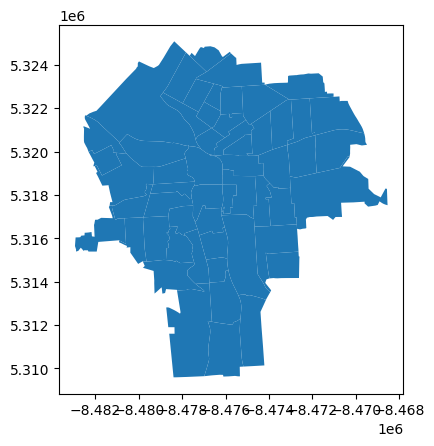

In [111]:
import geopandas as gpd

# Assuming the file is in the current working directory (which you set previously)
file_path = 'Census_Tracts_in_Syracuse%2C_NY_(2010).shp'

# Read the shapefile using geopandas
CENSUS_SYR = gpd.read_file(file_path)

# Print some info to check if it loaded correctly
print(CENSUS_SYR.head())
print(CENSUS_SYR.info())
CENSUS_SYR.plot()
CENSUS_SYR.head()

In [85]:
# Extract critical socio-economical parameters to build the regression model
import geopandas as gpd
burden_categories = gpd.read_file('usa.shp')

socioeconomical_parameters = burden_categories[['LIF_PFS', 'LMI_PFS', 'UF_PFS', 'HSEF', 'P100_PFS', 'GEOID10']]
print(socioeconomical_parameters.head())

   LIF_PFS  LMI_PFS  UF_PFS  HSEF  P100_PFS      GEOID10
0     0.12     0.82    0.02  0.08      0.62  01073001100
1     0.58     0.83    0.90  0.17      0.86  01073001400
2     0.54     0.93    0.94  0.23      0.98  01073002000
3     0.12     0.79    0.87  0.14      0.73  01073003802
4     0.71     0.98    0.98  0.17      0.95  01073004000


In [86]:
# Identify the data type
print(type(potholes_only))
print(type(socioeconomical_parameters))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.frame.DataFrame'>


       fullDate                 location  leakClass month  date weekday  \
1771 2012-07-23         316 BROADVIEW DR          0   7.0  23.0    None   
1763 2012-06-19             107 ALTON ST          0   6.0  19.0    None   
1595 2012-02-08         315 BROADVIEW DR          0   2.0   8.0    None   
2526 2015-09-03  315 BROADVIEW DR, 13215          0   9.0   3.0    None   
2954 2018-02-02  312 BROADVIEW DR, 13215          2   2.0   2.0    None   

        year  week        lon        lat  ...  Created_at Acknowledg  \
1771  2012.0  30.0 -76.200118  43.022878  ...         NaN        NaN   
1763  2012.0  25.0 -76.195723  43.023044  ...         NaN        NaN   
1595  2012.0   6.0 -76.199797  43.023080  ...         NaN        NaN   
2526  2015.0  36.0 -76.199797  43.023080  ...         NaN        NaN   
2954  2018.0   5.0 -76.200354  43.023101  ...         NaN        NaN   

      Closed_at_  Minutes_to Minutes__1  Assignee_n Category Sla_in_hou  \
1771         NaN         NaN        NaN  

<Axes: >

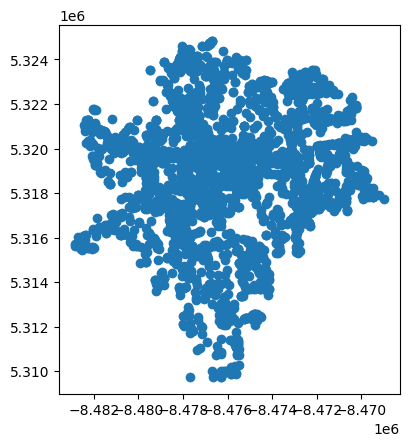

In [114]:
# Join water_main_breaks and potholes_only
merged_failure_data = gpd.sjoin(clipped_water_main_breaks, potholes_only, how='left', predicate='intersects')
print(merged_failure_data.head())
merged_failure_data.info()
merged_failure_data.plot()

In [87]:
import geopandas as gpd
import pandas as pd

# Merge dataframes on 'GEOID10' column using an inner join
merged_data = pd.merge(CENSUS_SYR, socioeconomical_parameters, on='GEOID10', how='inner')

# Convert merged data back to a GeoDataFrame
socioeconomical_parameters_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry, crs=CENSUS_SYR.crs)

# Display the merged GeoDataFrame
print(socioeconomical_parameters_gdf.head())
print(socioeconomical_parameters_gdf.info())

   FID STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10          NAMELSAD10  \
0    1        36        067    004302  36067004302  43.02  Census Tract 43.02   
1    2        36        067    004301  36067004301  43.01  Census Tract 43.01   
2    3        36        067    002101  36067002101  21.01  Census Tract 21.01   
3    4        36        067    000501  36067000501   5.01   Census Tract 5.01   
4    5        36        067    002901  36067002901  29.01  Census Tract 29.01   

  MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10    INTPTLON10  TractID  \
0   G5020          S  1195046         0  +43.0400403  -076.1346433    43.02   
1   G5020          S   359062         0  +43.0388643  -076.1400148    43.01   
2   G5020          S  1578293         0  +43.0526383  -076.1712469    21.01   
3   G5020          S   714188         0  +43.0637527  -076.1569900     5.01   
4   G5020          S  1870601         0  +43.0441999  -076.1820651    29.01   

                                      

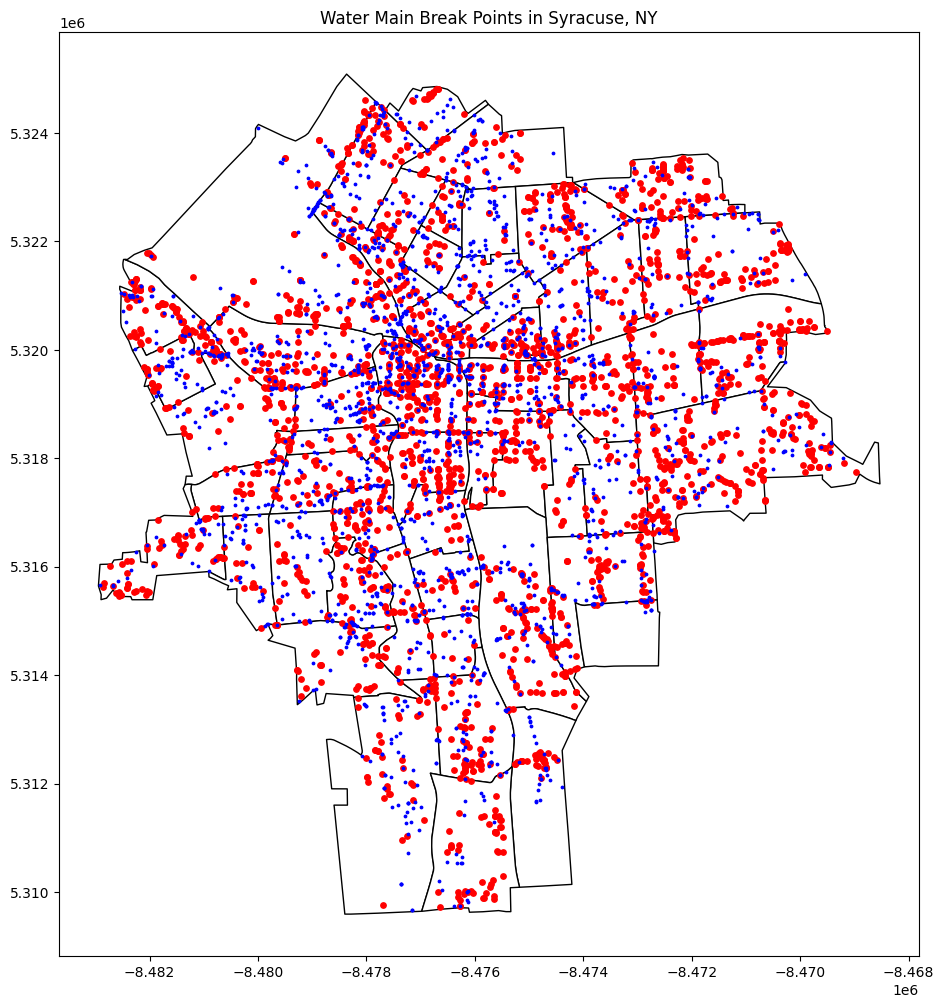

In [129]:
import matplotlib.pyplot as plt

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust figure size as needed

# Plot the boundary area first
CENSUS_SYR.plot(ax=ax, color='white', edgecolor='black')  # Customize color and edgecolor

# Plot the clipped water main breaks on top
clipped_water_main_breaks.plot(ax=ax, color='red', markersize=15)  # Customize color and markersize

# Plot the potholes on top
potholes_only.plot(ax=ax, color='blue', markersize=3)  # Customize color and markersize

# Set the title of the plot
ax.set_title('Water Main Break Points in Syracuse, NY')

# Show the plot
plt.show()

In [118]:
import pandas as pd
import geopandas as gpd
import statsmodels.api as sm
import statsmodels.formula.api as smf

water_main_census = gpd.sjoin(clipped_water_main_breaks, socioeconomical_parameters_gdf, how='left', predicate='intersects')
break_counts = water_main_census.groupby('GEOID10').size().reset_index(name='break_count')
regression_data = pd.merge(socioeconomical_parameters_gdf, break_counts, on='GEOID10', how='left')
regression_data['break_count'] = regression_data['break_count'].fillna(0)  # Fill NaN with 0 for tracts with no breaks

model.predict(regression_data)
regression_data['predicted_breaks'] = model.predict(regression_data)

formula = 'break_count ~ LIF_PFS + LMI_PFS + UF_PFS + HSEF + P100_PFS'
model = smf.glm(formula=formula, data=regression_data, family=sm.families.Poisson()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            break_count   No. Observations:                   54
Model:                            GLM   Df Residuals:                       48
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -738.96
Date:                Thu, 05 Dec 2024   Deviance:                       1176.0
Time:                        19:57:49   Pearson chi2:                 1.29e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9955
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7841      0.063     76.123      0.0

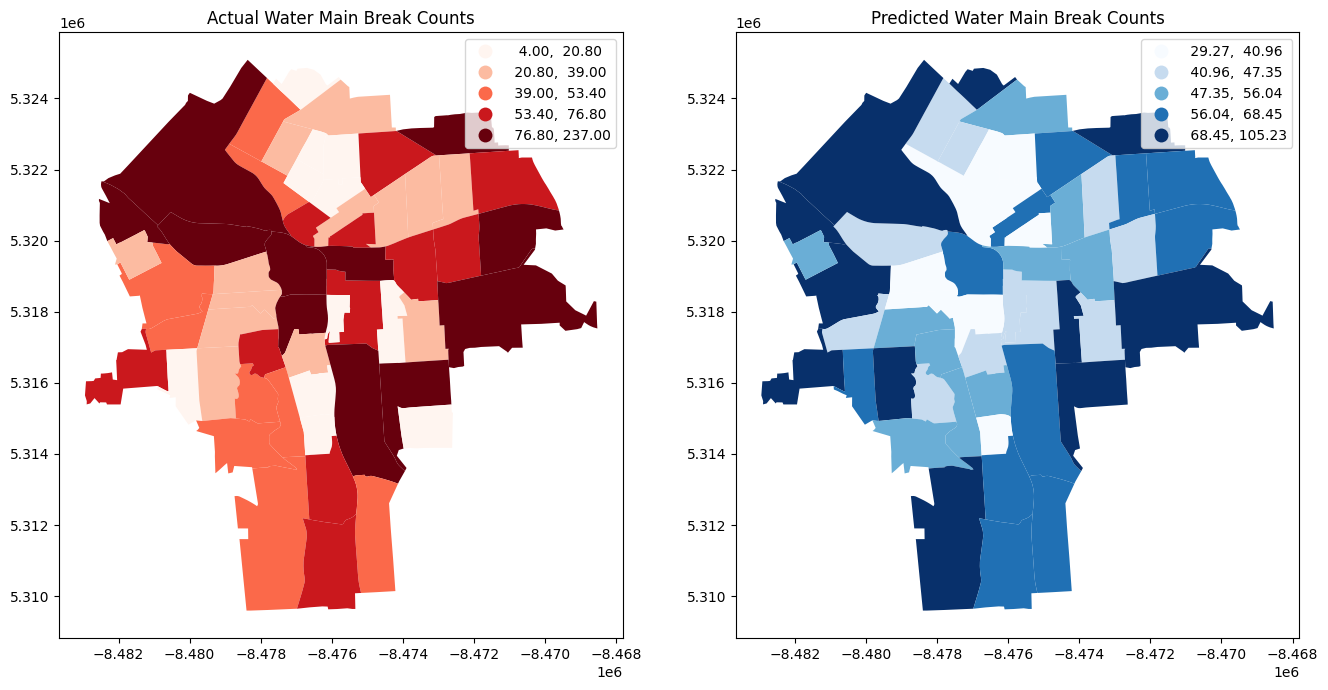

In [121]:
# Create a figure and axes for the plot
fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns for side-by-side plots

# Plot the actual break counts
regression_data.plot(column='break_count', cmap='Reds', scheme='quantiles', legend=True, ax=ax[0])
ax[0].set_title('Actual Water Main Break Counts')

# Plot the predicted break counts
regression_data.plot(column='predicted_breaks', cmap='Blues', scheme='quantiles', legend=True, ax=ax[1])
ax[1].set_title('Predicted Water Main Break Counts')

# Show the plot
plt.show()

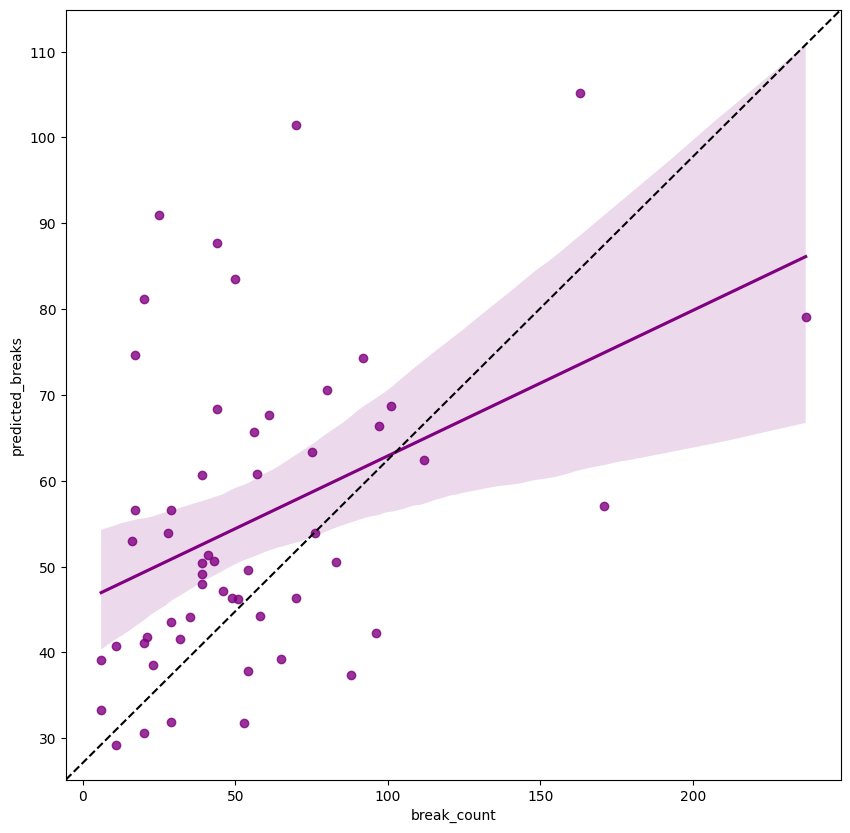

In [123]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.regplot(x='break_count', y='predicted_breaks', data=regression_data, color="purple", ax=ax)

# Add a diagonal line
# ax.set(xlim=[5, 30], ylim=[5, 30])
ax.plot((0, 1), (0, 1), transform=ax.transAxes, ls='--', c='k')


In [94]:
regression_data.head()

,FID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,...,INTPTLAT10,INTPTLON10,TractID,geometry,LIF_PFS,LMI_PFS,UF_PFS,HSEF,P100_PFS,break_count
0,1,36,067,004302,36067004302,43.02,Census Tract 43.02,G5020,S,1195046,...,+43.0400403,-076.1346433,43.02,"POLYGON ((-8474750.051 5316930.191, -8474860.1...",0.73,0.99,0.97,0.24,0.99,70
1,2,36,067,004301,36067004301,43.01,Census Tract 43.01,G5020,S,359062,...,+43.0388643,-076.1400148,43.01,"POLYGON ((-8475779.534 5317145.837, -8475941.1...",0.67,0.99,0.98,0.31,0.99,20
2,3,36,067,002101,36067002101,21.01,Census Tract 21.01,G5020,S,1578293,...,+43.0526383,-076.1712469,21.01,"POLYGON ((-8480564.713 5319907.191, -8480644.4...",0.57,0.89,0.97,0.24,0.98,96
3,4,36,067,000501,36067000501,5.01,Census Tract 5.01,G5020,S,714188,...,+43.0637527,-076.1569900,5.01,"POLYGON ((-8477382.089 5320573.396, -8477402.2...",0.88,0.90,0.96,0.42,0.90,53
4,5,36,067,002901,36067002901,29.01,Census Tract 29.01,G5020,S,1870601,...,+43.0441999,-076.1820651,29.01,"POLYGON ((-8481869.6 5319235.246, -8481792.567...",0.42,0.29,0.23,0.02,0.34,44
